In [9]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [10]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 2000
generations = 100
mutation_rate = 0.01
crossover_probability = 0.7
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, mutation_rate, crossover_probability)

# Run optimzation and write to file

solution = ga.solve_tsp(tsp_data)
improvement = ga.population_fitness
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

Generation  1
Length of the best route =  3129.0
Generation  2
Length of the best route =  3129.0
Generation  3
Length of the best route =  3129.0
Generation  4
Length of the best route =  2789.0
Generation  5
Length of the best route =  3081.0
Generation  6
Length of the best route =  3075.0
Generation  7
Length of the best route =  2861.0
Generation  8
Length of the best route =  2883.0
Generation  9
Length of the best route =  2837.0
Generation  10
Length of the best route =  2911.0
Generation  11
Length of the best route =  2991.0
Generation  12
Length of the best route =  3061.0
Generation  13
Length of the best route =  3057.0
Generation  14
Length of the best route =  2813.0
Generation  15
Length of the best route =  3089.0
Generation  16
Length of the best route =  2591.0
Generation  17
Length of the best route =  2591.0
Generation  18
Length of the best route =  2631.0
Generation  19
Length of the best route =  2779.0
Generation  20
Length of the best route =  2779.0
Generatio

[0.383243686892843, 0.38896967910739777, 0.3925118019301358, 0.3962612339666752, 0.400470922551816, 0.4041907498150822, 0.4055660568032621, 0.4063749707084176, 0.40741174301042743, 0.41018559018546596, 0.4107218001651422, 0.41263136393720473, 0.4134416692758543, 0.4162305531748791, 0.4154425039615917, 0.4166776656517248, 0.41555386588780063, 0.4157192606366036, 0.41898798604531534, 0.42007825925715203, 0.42194424882404014, 0.4224977340010775, 0.422781771336796, 0.4262501883899839, 0.4285336878558255, 0.4328449013707998, 0.43599613234964346, 0.439526886879374, 0.44040932207847405, 0.4423502499857594, 0.44466008434954196, 0.44657986725929005, 0.44850154181226287, 0.44839833294968695, 0.4493972584176106, 0.45088629624569887, 0.4535730457763256, 0.4587450321174785, 0.4607430985273082, 0.4607339315120278, 0.4660074553115582, 0.4684228450959948, 0.4703376220408036, 0.47066507892542164, 0.4724983167679093, 0.47684341898157406, 0.47673616151818793, 0.4782446170472153, 0.47885290798351426, 0.48

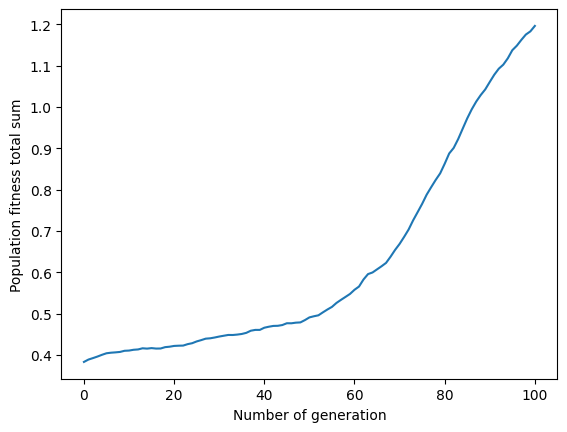

In [11]:
import matplotlib.pyplot as plt
import numpy as np
print(improvement)
plt.plot(improvement)
plt.xlabel("Number of generation")
plt.ylabel("Population fitness total sum")
plt.show()

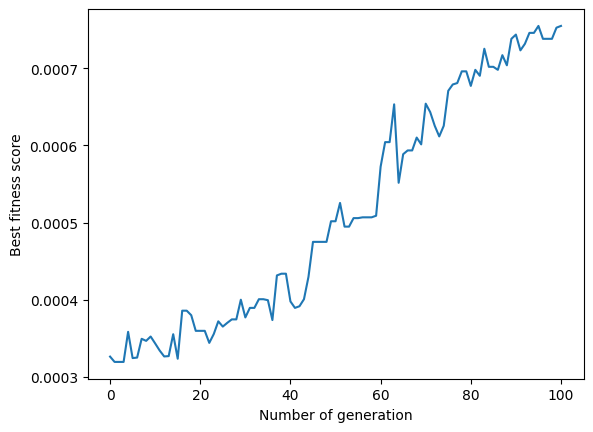

In [12]:
plt.plot(ga.best_route_across_generation)
plt.xlabel("Number of generation")
plt.ylabel("Best fitness score")
plt.show()

[0.000326477309826967, 0.00031959092361776926, 0.00031959092361776926, 0.00031959092361776926, 0.00035855145213338117, 0.0003245699448231094, 0.0003252032520325203, 0.0003495281370150297, 0.000346860908775581, 0.00035248501938667606, 0.00034352456200618345, 0.00033433634236041456, 0.0003266906239790918, 0.00032711808963035657, 0.00035549235691432633, 0.0003237293622531564, 0.00038595137012736397, 0.00038595137012736397, 0.0003800836183960471, 0.0003598416696653472, 0.0003598416696653472, 0.0003598416696653472, 0.00034423407917383823, 0.0003557452863749555, 0.0003721622627465575, 0.00036536353671903543, 0.00037023324694557573, 0.0003746721618583739, 0.0003746721618583739, 0.00040016006402561027, 0.0003772161448509996, 0.00038955979742890534, 0.00038955979742890534, 0.0004008016032064128, 0.0004008016032064128, 0.00039952057530962844, 0.00037383177570093456, 0.00043159257660768235, 0.0004338394793926247, 0.0004338394793926247, 0.0003979307600477517, 0.00038955979742890534, 0.000391696043

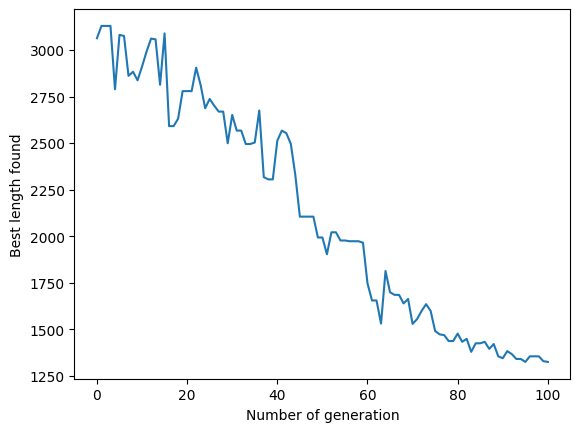

[ 1  2  7  5 14 16  4  9  8 18 10 15 12 13  6 11  3 17]
1325.0


In [13]:
best = ga.population.take_best_chromosome()
print(ga.best_route_across_generation)
print(1.0 / np.max(ga.best_route_across_generation))
scores = np.array(ga.best_route_across_generation)
scores = 1.0 / scores
plt.plot(scores)
plt.xlabel("Number of generation")
plt.ylabel("Best length found")
plt.show()
print(best.get_products())
print(1.0 / best.get_score())

In [8]:
print(tsp_data.get_distances())
print(tsp_data.get_start_distances())
print(tsp_data.get_end_distances())

[[0, 69, 698, 240, 132, 527, 156, 459, 374, 409, 599, 428, 483, 167, 425, 221, 691, 465], [69, 0, 647, 189, 81, 476, 105, 408, 323, 358, 548, 377, 432, 116, 374, 170, 640, 414], [698, 647, 0, 472, 568, 185, 596, 345, 324, 289, 105, 270, 237, 531, 283, 491, 183, 351], [240, 189, 472, 0, 110, 301, 138, 233, 148, 183, 373, 202, 257, 73, 199, 19, 465, 239], [132, 81, 568, 110, 0, 397, 36, 329, 244, 279, 469, 298, 353, 37, 295, 91, 561, 335], [527, 476, 185, 301, 397, 0, 425, 174, 153, 118, 86, 99, 66, 360, 112, 320, 178, 180], [156, 105, 596, 138, 36, 425, 0, 357, 272, 307, 497, 326, 381, 65, 323, 119, 589, 363], [459, 408, 345, 233, 329, 174, 357, 0, 85, 56, 246, 75, 130, 292, 72, 252, 338, 26], [374, 323, 324, 148, 244, 153, 272, 85, 0, 35, 225, 54, 109, 207, 51, 167, 317, 91], [409, 358, 289, 183, 279, 118, 307, 56, 35, 0, 190, 19, 74, 242, 16, 202, 282, 62], [599, 548, 105, 373, 469, 86, 497, 246, 225, 190, 0, 171, 138, 432, 184, 392, 98, 252], [428, 377, 270, 202, 298, 99, 326, 75, 54

In [7]:
from GeneticAlgorithm import Chromosome
from GeneticAlgorithm import Population

chromosome = Chromosome()
chromosome.create_chromosome(4)
print(chromosome.products)
distances = [
    [0, 1, 3, 6],
    [5, 0, 3, 2],
    [9, 4, 0, 8],
    [2, 6, 7 ,0]
]
# print(chromosome.fitness_function(distances))

population = Population(0.1, 0.7, tsp_data)
population.create_random_population(population_size, len(tsp_data.get_start_distances()))
print(population.chromosomes)
print(population.calculate_population_fitness())
print(ga.roulette(population))

[2 4 3 1]
[<GeneticAlgorithm.Chromosome object at 0x000002CEC636A940>, <GeneticAlgorithm.Chromosome object at 0x000002CEC53A5820>, <GeneticAlgorithm.Chromosome object at 0x000002CEC53A5C70>, <GeneticAlgorithm.Chromosome object at 0x000002CEC53A5310>, <GeneticAlgorithm.Chromosome object at 0x000002CEC53A5EB0>, <GeneticAlgorithm.Chromosome object at 0x000002CEC53A5D00>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C490>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C190>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636CD90>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C5B0>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C850>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C910>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C220>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C1C0>, <GeneticAlgorithm.Chromosome object at 0x000002CEC64B5460>, <GeneticAlgorithm.Chromosome object at 0x000002CEC636C8E0>, <GeneticAlgorithm.Chromosome 

AttributeError: 'GeneticAlgorithm' object has no attribute 'roulette'

### Part 2: Path Finding Through Ant Colony Optimization

In [ ]:
# Please keep your parameters for the ACO easily changeable here
gen = 1
no_gen = 1
q = 1600
evap = 0.1

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")
spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

### Synthesis

In [ ]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")